# SMArt
## Welcome to Simulation & Modelling Art
### importing

In [1]:
import sys
import os

smart_fd = os.path.abspath(os.getcwd())
for _ in range(3):
    smart_fd = os.path.split(smart_fd)[0]


sys.path.insert(0, smart_fd)

import SMArt
help(SMArt)

Help on package SMArt:

NAME
    SMArt - SimulationsModellingArt

PACKAGE CONTENTS
    __local_config
    __local_config_data
    alchemy (package)
    geometry
    graph (package)
    incl
    md (package)
    mp_fnc

FILE
    c:\users\draze\poso_local\coding\clean_smart\smart\smart\__init__.py




C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\__local_config.py:22: WARN: gmx not found
  do_warn('gmx not found')
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\__local_config.py:34: WARN: gpp not found
  do_warn('gpp not found')
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\__local_config.py:42: WARN: gxx not found
  do_warn('gxx not found')
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\__local_config.py:50: WARN: pdb2pqr not found
  do_warn('pdb2pqr not found')


In [2]:
from SMArt.md import parse_top, parse_ff
from SMArt.md import FF, BBdb, Topology, Configuration, MolSystem

from SMArt.md.gromos.io.incl import GromosFile, GromosString
from SMArt.md.gromacs.io.incl import GromacsFile, GromacsString


## GROMOS
### parsing / writing

In [3]:
import os

out_fd = os.path.abspath(os.getcwd())
out_fd = os.path.join(out_fd, 'out_data')
if not os.path.isdir(out_fd):
    os.mkdir(out_fd)


fd_gromos = os.path.join(smart_fd, 'doc', 'examples', 'some_data', 'gromos')
ifp_file = os.path.join(fd_gromos, '54a8.ifp')
ff_gr = parse_ff(ifp_file)

C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: SPECATOMLJPAIR
  do_warn('unknown block read in as text: ' + bl_name)


In [4]:
# data of any object is stored in _containers
ff_gr._containers

['sys_title',
 'm_type',
 'gr_bonds',
 'gr_angles',
 'gr_impropers',
 'gr_dihedrals',
 'a_type',
 'vdw']

In [5]:
ff_gr.m_type

OrderedDict([('1', 1 1.008),
             ('3', 3 13.019),
             ('4', 4 14.027),
             ('5', 5 15.035),
             ('6', 6 16.043),
             ('12', 12 12.011),
             ('14', 14 14.0067),
             ('16', 16 15.9994),
             ('19', 19 18.9984),
             ('23', 23 22.9898),
             ('24', 24 24.305),
             ('28', 28 28.08),
             ('31', 31 30.9738),
             ('32', 32 32.06),
             ('35', 35 35.453),
             ('39', 39 39.948),
             ('40', 40 40.08),
             ('56', 56 55.847),
             ('63', 63 63.546),
             ('65', 65 65.37),
             ('80', 80 79.904)])

In [6]:
ff_gr.m_type['1'] # mass type

1 1.008

In [7]:
ff_gr.a_type['2'] # atom type 2

2 OM

In [8]:
ff_gr.gr_bonds['1'] # bond type 2

BondType (15700000.0, 314000.0, 0.1)

In [9]:
top_file = os.path.join(fd_gromos, 'top.top')
top_gr = parse_top(top_file)

C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: TOPVERSION
  do_warn('unknown block read in as text: ' + bl_name)
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: CROSSDIHEDRALH
  do_warn('unknown block read in as text: ' + bl_name)
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: CROSSDIHEDRAL
  do_warn('unknown block read in as text: ' + bl_name)
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: LJEXCEPTIONS
  do_warn('unknown block read in as text: ' + bl_name)
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\gromos\io\incl.py:153: WARN: unknown block read in as text: SOLVENTATOM
  do_warn('unknown block read in as text: ' + bl_name)
C:\Users\draze\poso_local\coding\clean_smart\smart\SMArt\md\

In [10]:
SMArt.incl.set_print_warnings(False) # if these warnings are anoying you, you can turn them off
top_file = os.path.join(fd_gromos, 'test_pept.top')
top_gr = parse_top(top_file, format_type = 'gr')

In [11]:
top_gr.ff._containers

['a_type', 'gr_bonds', 'gr_angles', 'gr_impropers', 'gr_dihedrals', 'vdw']

In [12]:
top_gr._containers

['sys_title',
 'ff',
 'residues',
 'cg',
 'excl_pair',
 'bonds',
 'angles',
 'impropers',
 'dihedrals']

In [13]:
# write out FF ifp file
out_file = os.path.join(out_fd, 'new_ff.ifp')
ff_gr.write_ff(out_file, format_type = 'gr')

In [14]:
# write out top file
out_file = os.path.join(out_fd, 'new_top.top')
top_gr.write_top(out_file)

In [15]:
len(top_gr.atoms)

175

In [16]:
top_gr.residues['1'].atoms

[1 H1,
 2 H2,
 3 N,
 4 H3,
 5 CA,
 6 CB,
 7 CG,
 8 CD,
 9 NE,
 10 HE,
 11 CZ,
 12 NH1,
 13 HH11,
 14 HH12,
 15 NH2,
 16 HH21,
 17 HH22,
 18 C,
 19 O]

In [17]:
# reduce topolgy to first 19 atoms
red_top = top_gr.reduce_top([str(i) for i in range(1,20)])

In [18]:
red_top.residues

OrderedDict([('1', <SMArt.md.data_st.Residue at 0x27d251bf048>)])

In [19]:
red_top.atoms

OrderedDict([('1', 1 H1),
             ('2', 2 H2),
             ('3', 3 N),
             ('4', 4 H3),
             ('5', 5 CA),
             ('6', 6 CB),
             ('7', 7 CG),
             ('8', 8 CD),
             ('9', 9 NE),
             ('10', 10 HE),
             ('11', 11 CZ),
             ('12', 12 NH1),
             ('13', 13 HH11),
             ('14', 14 HH12),
             ('15', 15 NH2),
             ('16', 16 HH21),
             ('17', 17 HH22),
             ('18', 18 C),
             ('19', 19 O)])

In [20]:
out_file = os.path.join(out_fd, 'new_red_top.top')
red_top.write_top(out_file)

In [21]:
os.chdir(out_fd)
mtb_file = os.path.join(fd_gromos, '54a8.mtb')
mtb = BBdb(mtb_file) # read an mtb file - same as md.parse_mtb(fd_gromos + '54a8.mtb')
mtb.write_mtb('mtb1.mtb')

mtb.dump('mtb_pickle_dump.p')
mtbp = SMArt.incl.DataDumping.load('mtb_pickle_dump.p')
mtbp.write_mtb('testp.mtb')

ifp_file = os.path.join(fd_gromos, '54a8.ifp')
mtb2 = BBdb(mtb_file, ifp_file)
mtb2.write_mtb('mtb2.mtb')
print(os.popen('diff ' + 'mbt1.mtb ' + 'testp.mtb').read())

## GROMACS
### parsing / writing

In [22]:
ff = parse_ff('./gromos54a7.ff/forcefield.itp', format_type = 'gm') # default for format_type is 'gr'

In [23]:
list(ff.defines.items())[:10]

[('_FF_GROMOS96', []),
 ('_FF_GROMOS54A7', []),
 ('gb_1', ['0.1000', '1.5700e+07']),
 ('gb_2', ['0.1000', '1.8700e+07']),
 ('gb_3', ['0.1090', '1.2300e+07']),
 ('gb_4', ['0.112', '3.7000e+07']),
 ('gb_5', ['0.1230', '1.6600e+07']),
 ('gb_6', ['0.1250', '1.3400e+07']),
 ('gb_7', ['0.1320', '1.2000e+07']),
 ('gb_8', ['0.1330', '8.8700e+06'])]

In [24]:
ff._containers

['_segments',
 'sys_title',
 'a_type',
 'gm_vdw_normal',
 'gm_vdw_pairs',
 'gm_constraints',
 'gm_bonds',
 'gm_angles',
 'gm_dihedrals']

In [25]:
ff.gm_bonds

[BondType (0.204, 5030000.0), BondType (0.198, 640000.0)]

In [26]:
fd_gromacs = os.path.join(smart_fd, 'doc', 'examples', 'some_data', 'gromacs')
top_file = os.path.join(fd_gromacs, 'gromos', 'topol.top')

In [27]:
top = parse_top(top_file, format_type = 'gm')

In [28]:
top._containers

['_segments', 'sys_title', 'ff', 'molecule_types', 'molecules']

In [29]:
top.molecules, top.molecules[0]

([Protein_chain_A Protein_chain_A 1], Protein_chain_A Protein_chain_A 1)

In [30]:
top.molecule_types

OrderedDict([('Protein_chain_A', Protein_chain_A Protein_chain_A),
             ('SOL', SOL SOL),
             ('CU1', CU1 CU1),
             ('CU', CU CU),
             ('ZN', ZN ZN),
             ('MG', MG MG),
             ('CA', CA CA),
             ('NA', NA NA),
             ('CL', CL CL)])

In [31]:
top.molecule_types['Protein_chain_A']._containers

['residues',
 'cg',
 'bonds',
 'vdw_pairs',
 'angles',
 'dihedrals',
 'impropers',
 'excl_pair']

In [32]:
os.chdir(out_fd)

In [33]:
ff.write_ff('gmx_ff.itp', from_str = 1, flag_segment_order=1, flag_split_non_bonded = 1, flag_if=1, format_type = 'gm')

In [34]:
top.write_top('gm_top.top', format_type = 'gm')

## g2g
### gromos to gromacs & gromacs to gromos

In [35]:
# gromos to gromacs
ff_gr.gr2gm()
top_gr.gr2gm()
# gromacs to gromos
ff.gm2gr()
top.gm2gr()

In [36]:
ff_gr.write_ff('gr2gm_ff.itp', format_type = 'gm')
top_gr.write_top('gr2gm_top.top', from_str = 1, flag_segment_order=1, flag_if=1, flag_include = 1, sep_ff2itp='top_ff.itp', flag_defines_first_include = 1, sep_mol2itp=1, format_type='gm')

ff.write_ff('gm2gr_ff.ifp', format_type = 'gr')
top.write_top('gm2gr_top.top')

# some additional features

In [37]:
top.molecule_types['Protein_chain_A'].create_adj_list()
top.molecule_types['Protein_chain_A'].find_rings()

([177 CD1, 181 CE1, 185 CZ, 183 CE2, 179 CD2, 176 CG],
 [377 CD1, 381 CE1, 385 CZ, 383 CE2, 379 CD2, 376 CG],
 [238 CD2,
  242 CE3,
  246 CZ3,
  248 CH2,
  244 CZ2,
  241 CE2,
  239 NE1,
  236 CD1,
  235 CG],
 [219 CD, 218 CG, 217 CB, 216 CA, 215 N],
 [106 CD1, 110 CE1, 114 CZ, 112 CE2, 108 CD2, 105 CG],
 [64 CD2, 68 CE2, 70 CZ, 66 CE1, 62 CD1, 61 CG])

In [38]:
top_gr.find_rings()

([153 CD1, 157 CE1, 161 CZ, 159 CE2, 155 CD2, 152 CG],)

In [39]:
at = top_gr.atoms['3']
print(list(top_gr.BFS_l(at, 3))) # 3rd neighbours
top_gr.atoms['3'].p_l # pair list

[20 N, 19 O, 7 CG]


[]

In [40]:
print(list(top_gr.BFS_l(at, 1))) # first neighbours

[4 H3, 2 H2, 1 H1, 5 CA]


In [41]:
print(list(top_gr.BFS_d(at, 3))) # all up to 3rd neighbours

[3 N, 4 H3, 2 H2, 1 H1, 5 CA, 18 C, 6 CB, 20 N, 19 O, 7 CG]


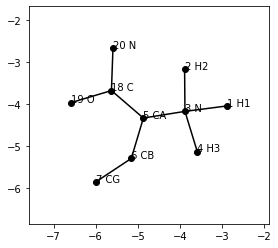

,x,y
idx,,
3 N,-3.880086,-4.169818
4 H3,-3.587112,-5.125960
2 H2,-3.888288,-3.169837
1 H1,-2.888298,-4.041687
5 CA,-4.867445,-4.328521
18 C,-5.625325,-3.676091
6 CB,-5.153574,-5.286777
20 N,-5.589406,-2.676734
19 O,-6.583653,-3.961751


In [42]:
G = top_gr.sub_graph(list(top_gr.BFS_d(at, 3)))
G.get_2D_repr()

In [43]:
#"""
# remove all backed-up files
import glob
for f_path in glob.glob('#bck*'):
    os.remove(f_path)
#"""